## === Task ===

1) Learn about TFidVectorizer and replace CountVectorizer with TFIDVectorizer (Explanation Provided in the Lecture) 

2) Put Multinomial Naive Classification into a class that can transform the data, fit the model and do prediction. 
- In the class, allow users to choose whether to use CountVectorizer or TFIDVectorizer to transform the data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [13]:
class MultinomialNB():
    def __init__(self,):
        pass
    
    def data_transform(self, train_data, test_data, method):
        
        #-----CountVectorizer method!!!
        if method == 'CountVectorizer':
            vectorizer = CountVectorizer()
            X_train = vectorizer.fit_transform(train.data)
            X_test = vectorizer.transform(test.data)
            X_test = X_test.toarray()  #vectorizer gives us a sparse matrix; convert back to dense matrix
            return X_train, X_test
        
        #-----TFidVectorizer method!!!
        elif method == 'TfidfVectorizer':
            vectorizer = TfidfVectorizer()
            X_train = vectorizer.fit_transform(train.data)
            X_test = vectorizer.transform(test.data)
            X_test = X_test.toarray()  #vectorizer gives us a sparse matrix; convert back to dense matrix
            return X_train, X_test
        
        else:
            raise ValueError("Please select one of the following method: 'CountVectorizer' or 'TfidfVectorizer'.") 
        
    def likelihood(self, X_class, laplace=1):
        return ((X_class.sum(axis=0)) + laplace) / (np.sum(X_class.sum(axis=0) + laplace))
    
    def prior(self, X_class):
        return X_class.shape[0] / self.m
    
    def fit(self, X_train, y_train):
        self.m, self.n = X_train.shape
        self.classes = np.unique(y_train)        #<---list of class
        self.k = len(self.classes)                    #<---number of class
    
        self.priors = np.zeros(self.k)                #<---prior for each classes
        self.likelihoods = np.zeros((self.k, self.n)) #<---likehood for each class of each feature
    
        for idx, label in enumerate(self.classes):
            X_train_c = X_train[y_train==label]
            self.priors[idx] = self.prior(X_train_c)
            self.likelihoods[idx, :] = self.likelihood(X_train_c)
    
    def predict(self, X_test):
        yhat = np.log(self.priors) + X_test @ np.log(self.likelihoods.T)
        return np.argmax(yhat, axis = 1 )
    

In [3]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

train_data = train.data
test_data = test.data

## Train with CountVectorizer

In [7]:
model = MultinomialNB()
X_train, X_test = model.data_transform(train_data, test_data, method='CountVectorizer')

y_train = train.target
y_test = test.target

model.fit(X_train, y_train)
yhat = model.predict(X_test)

In [8]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import average_precision_score, classification_report

n_classes = len(np.unique(y_test))

print("Accuracy: ", np.sum(yhat == y_test)/len(y_test))

print("=========Average precision score=======")
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])
yhat_binarized = label_binarize(yhat, classes=[0, 1, 2, 3])

for i in range(n_classes):
    class_score = average_precision_score(y_test_binarized[:, i], yhat_binarized[:, i])
    print(f"Class {i} score: ", class_score)
    
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

Accuracy:  0.9168994413407822
=========Average precision score=======
Class 0 score:  0.9152047938418233
Class 1 score:  0.9069918620723723
Class 2 score:  0.8429395016564877
Class 3 score:  0.7277310085946386
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.95      0.95      0.95       389
           1       0.94      0.96      0.95       394
           2       0.87      0.95      0.91       398
           3       0.92      0.74      0.82       251

    accuracy                           0.92      1432
   macro avg       0.92      0.90      0.91      1432
weighted avg       0.92      0.92      0.92      1432



Text(32.99999999999999, 0.5, 'predicted')

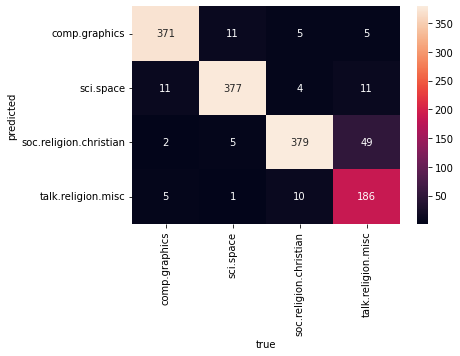

In [9]:
from sklearn.metrics import confusion_matrix

#use confusion matrix
mat = confusion_matrix(y_test, yhat)

import seaborn as sns
sns.heatmap(mat.T, annot=True, fmt="d",
           xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true')
plt.ylabel('predicted')

## Train with TfidVectorizer

In [14]:
model = MultinomialNB()

X_train, X_test = model.data_transform(train_data, test_data, method='TfidfVectorizer')          
y_train = train.target
y_test = test.target

model.fit(X_train, y_train)
yhat = model.predict(X_test)

In [15]:
n_classes = len(np.unique(y_test))

print("Accuracy: ", np.sum(yhat == y_test)/len(y_test))

print("=========Average precision score=======")
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])
yhat_binarized = label_binarize(yhat, classes=[0, 1, 2, 3])

for i in range(n_classes):
    class_score = average_precision_score(y_test_binarized[:, i], yhat_binarized[:, i])
    print(f"Class {i} score: ", class_score)
    
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

Accuracy:  0.8016759776536313
=========Average precision score=======
Class 0 score:  0.888341920518241
Class 1 score:  0.8744630809734135
Class 2 score:  0.6122064043881043
Class 3 score:  0.332994836297269
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.97      0.88      0.92       389
           1       0.92      0.92      0.92       394
           2       0.62      0.98      0.76       398
           3       1.00      0.19      0.32       251

    accuracy                           0.80      1432
   macro avg       0.88      0.75      0.73      1432
weighted avg       0.86      0.80      0.77      1432



Text(32.99999999999999, 0.5, 'predicted')

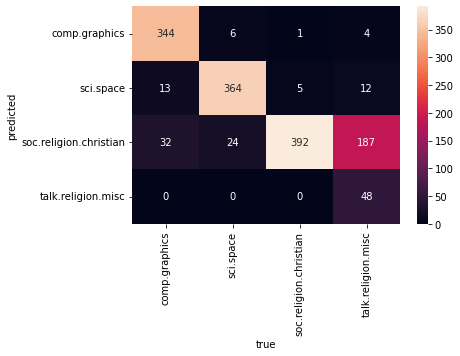

In [16]:
#use confusion matrix
mat = confusion_matrix(y_test, yhat)

sns.heatmap(mat.T, annot=True, fmt="d",
           xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true')
plt.ylabel('predicted')